##### Noda workshop 27th january 2017
------

# Cuddling with `pandas` and `Jupyter Notebook`

-----
[image]: http://assets.inhabitat.com/wp-content/blogs.dir/1/files/2016/09/panda-655491-889x665.jpg
![image]
source: assets.inhabitat.com

[logo]: http://pandas.pydata.org/_static/pandas_logo.png
![logo]
source: pandas.pydata.org

-----

### What is pandas?

> *an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.* - http://pandas.pydata.org/

-----
#### What we *will* talk about
   * Using `pandas` instead of `Excel`:
    * Selecting
    * Sorting
    * Grouping
    * Mapping data from other sources (=VLOOKUP())
  
#### What we will *not* talk (much) about
  1. Technical aspect
     * See pandas documentation (http://pandas.pydata.org/pandas-docs/stable/)
  2. Making data tidy  
  
  **Good reads** on making data look good
* Lindeborg, Robin (2017), *Reshaping data in Python* (https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77#.1m6mugi18)
* Hould, Jean-Nicholas (2016), *Tidy data in Python* (http://www.jeannicholashould.com/tidy-data-in-python.html)
* Wickham, Hadley (2014), *Tidy data* (http://vita.had.co.nz/papers/tidy-data.pdf)
   
   
 


       


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

## Reading files into pandas
`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

  * `pd.read_html()`
  * `pd.read_excel()`
  * `pd.read_json()`  
    ...and the list goes on

## Our project: *Top nordic websites*

Scraped from http://alexa.com/topsites/countries

In [3]:
raw_df = pd.read_csv("http://bit.ly/top500_sites")
raw_df

,global_ranking,country,scraped_url,site_url,site_title,country_ranking
0,12800,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/google.is,google.is,1
1,1,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/google.com,google.com,2
2,2,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/youtube.com,youtube.com,3
3,3,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/facebook.com,facebook.com,4
4,19225,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/mbl.is,mbl.is,5
5,17612,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/visir.is,visir.is,6
6,42465,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/ruv.is,ruv.is,7
7,5,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/wikipedia.org,wikipedia.org,8
8,23,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/reddit.com,reddit.com,9
9,6,IS,http://www.alexa.com/topsites/countries;0/IS,http://www.alexa.com/siteinfo/yahoo.com,yahoo.com,10


In [4]:
# List our columns
column_list = raw_df.columns
list(column_list)

['global_ranking',
 'country',
 'scraped_url',
 'site_url',
 'site_title',
 'country_ranking']

In [5]:
# Exclude 'scraped_url' and 'site_url' just to ease overview
df = raw_df[['global_ranking', 'country','site_title','country_ranking']]

## Inspecting a dataset in `pandas`

In [6]:
# Show the first 10 rows
df.head(10)

,global_ranking,country,site_title,country_ranking
0,12800,IS,google.is,1
1,1,IS,google.com,2
2,2,IS,youtube.com,3
3,3,IS,facebook.com,4
4,19225,IS,mbl.is,5
5,17612,IS,visir.is,6
6,42465,IS,ruv.is,7
7,5,IS,wikipedia.org,8
8,23,IS,reddit.com,9
9,6,IS,yahoo.com,10


In [7]:
# Show the bottom 5
df.tail(5)

,global_ranking,country,site_title,country_ranking
3995,890,US,custhelp.com,496
3996,2399,US,ulta.com,497
3997,2286,US,disney.go.com,498
3998,645,US,convert2mp3.net,499
3999,1066,US,nasa.gov,500


In [8]:
# Use .describe() to get an overview of numerical columns 
df.describe().round()

,global_ranking,country_ranking
count,4000.0,4000.0
mean,38257.0,250.0
std,150932.0,144.0
min,1.0,1.0
25%,243.0,126.0
50%,898.0,250.0
75%,14636.0,375.0
max,2111331.0,500.0


In [9]:
# Get a list of unique values in columns with categorical data 
df.country.unique()

array(['IS', 'DE', 'SE', 'HK', 'NO', 'FI', 'DK', 'US'], dtype=object)

## Selecting, sorting and filtering data

In [10]:
# Select one column
countries = df.country # or raw_df["country"] 
countries.head()

0    IS
1    IS
2    IS
3    IS
4    IS
Name: country, dtype: object

In [11]:
# Select two or more columns
columns = ["country", "site_title", "global_ranking", "country_ranking"]
df[columns].head()

,country,site_title,global_ranking,country_ranking
0,IS,google.is,12800,1
1,IS,google.com,1,2
2,IS,youtube.com,2,3
3,IS,facebook.com,3,4
4,IS,mbl.is,19225,5


In [12]:
# Get sites sorted by name
df.sort_values("site_title").head(10)

,global_ranking,country,site_title,country_ranking
2778,1163,FI,0483bm4mlow8.xyz,279
666,1184,DE,0483bm4mlow8.xyz,167
2436,2401,NO,04dn8g4f.space,437
3226,2401,DK,04dn8g4f.space,227
1462,2401,SE,04dn8g4f.space,463
1181,31444,SE,1177.se,182
130,257,IS,123movies.is,131
2059,253,NO,123movies.is,60
916,257,DE,123movies.is,417
3057,253,DK,123movies.is,58


In [13]:
# Selecting with conditions 

# Step 1: Define the condition
is_sweden = countries == "SE"

# Step 2: Apply the filter
df[is_sweden].head()

,global_ranking,country,site_title,country_ranking
1000,193,SE,google.se,1
1001,2,SE,youtube.com,2
1002,1,SE,google.com,3
1003,3,SE,facebook.com,4
1004,5,SE,wikipedia.org,5


In [14]:
# Selecting with multiple conditions on DataFrame
is_topsite = df["country_ranking"] == 1
is_denmark = df["country"] == "DK"

df[is_denmark & is_topsite]

,global_ranking,country,site_title,country_ranking
3000,351,DK,google.dk,1


In [15]:
# Select all Nordic countries

# Step 1: Define nordic countries
nordic_countries = ['IS', 'SE', 'NO', 'FI', 'DK']

# Step 2: Define a filter with .isin() + a top 5 filter
is_nordic = df["country"].isin(nordic_countries)
is_top_five = df["country_ranking"] <= 5

# Step 3: Apply the filter
df[is_nordic & is_top_five]

,global_ranking,country,site_title,country_ranking
0,12800,IS,google.is,1
1,1,IS,google.com,2
2,2,IS,youtube.com,3
3,3,IS,facebook.com,4
4,19225,IS,mbl.is,5
1000,193,SE,google.se,1
1001,2,SE,youtube.com,2
1002,1,SE,google.com,3
1003,3,SE,facebook.com,4
1004,5,SE,wikipedia.org,5


## Merging dataframes

In [16]:
# Get a list of pornsites
pornsites = pd.read_csv("http://bit.ly/pornsites")
pornsites.head()

,category,site
0,porn,porn.com
1,porn,xhamster.com
2,porn,pornhub.com
3,porn,pornhd.com
4,porn,porntube.com


In [17]:
# Check number of rows and colls
pornsites.shape

(788, 2)

In [18]:
# Inspect the content of the dataset
pornsites["category"].unique()

array(['porn'], dtype=object)

In [19]:
# Check that the values in the 
print "Length:", pornsites["site"].count()
print "Unique:", pornsites["site"].nunique()

Length: 788
Unique: 770


In [20]:
# Aha! There seems to be duplicates! 791 rows, but only 773 unique
# Removing them is simple 
unique_pornsites = pornsites.drop_duplicates()
unique_pornsites.shape

(770, 2)

In [21]:
# Now merge!
pd.merge(df, unique_pornsites, left_on="site_title", right_on="site")

,global_ranking,country,site_title,country_ranking,category,site
0,95,IS,bongacams.com,18,porn,bongacams.com
1,95,DE,bongacams.com,93,porn,bongacams.com
2,95,SE,bongacams.com,28,porn,bongacams.com
3,95,NO,bongacams.com,46,porn,bongacams.com
4,95,FI,bongacams.com,63,porn,bongacams.com
5,95,DK,bongacams.com,59,porn,bongacams.com
6,95,US,bongacams.com,103,porn,bongacams.com
7,74,IS,livejasmin.com,60,porn,livejasmin.com
8,74,DE,livejasmin.com,16,porn,livejasmin.com
9,74,SE,livejasmin.com,24,porn,livejasmin.com


Something went wrong here. We only got **142 rows** after the merge, while there were 4000 originally. Why is that?

By default `pd.merge()` does an **inner join**, inluding only sites that occur in both dataset. We want to do a **left join** preserving all rows in the left dataset (the Alexa data).

[image]: http://www.dofactory.com/Images/sql-joins.png
![image]


In [22]:
# Use the 'how' argument to specify join
# The "same" as: unique_pornsites.merge(df, how="right", left_on="site", right_on="site_title")
categorised_data = df.merge(unique_pornsites, how="left", left_on="site_title", right_on="site")

`Map()` is another method
1. Use the `key` (the thing that is supposed to match) in the `DataFrame` containing categories as index
2. Use the indexed `DataFrame` to map a specific `column` from it into the main `DataFrame`  


Like this:  

`indexed_unique_pornsites = unique_pornsites.set_index("site")`    

`df["category"] = df.site_title.map(indexed_unique_pornsites.category)`

# Q: Which nordic country has the most porn among the top sites?

## A. Does our data only contain nordic countries?

In [23]:
print "Our countries: %s" % categorised_data["country"].unique()

Our countries: ['IS' 'DE' 'SE' 'HK' 'NO' 'FI' 'DK' 'US']


In [24]:
categorised_data[is_nordic].country.unique()

array(['IS', 'SE', 'NO', 'FI', 'DK'], dtype=object)

## B. How much porn is there?

In [25]:
is_porn = categorised_data.category == "porn"

In [26]:
print "This much: %s sites, over all nordic countries" % len(categorised_data[is_nordic & is_porn])

This much: 90 sites, over all nordic countries


## C. Which country has the most porn?

In [27]:
count_of_pornsites = categorised_data[is_nordic & is_porn].groupby("country").category.count()

In [28]:
sorted_count_of_pornsites = count_of_pornsites.sort_values(ascending=False)

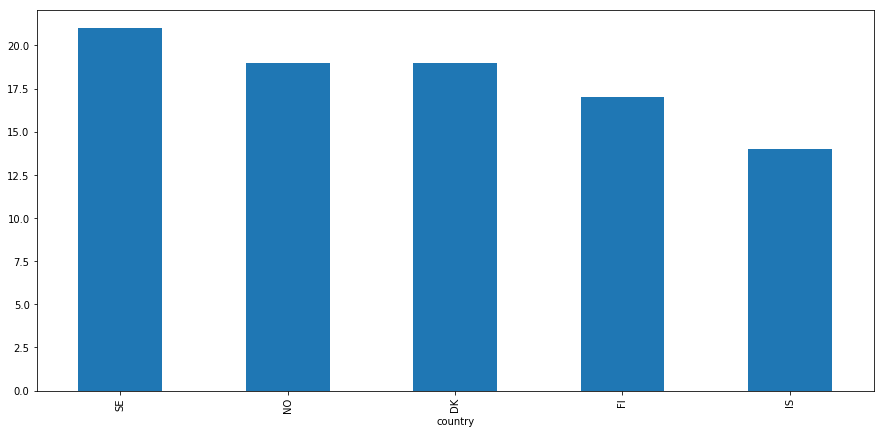

In [29]:
sorted_count_of_pornsites.plot.bar(figsize=(15,7))

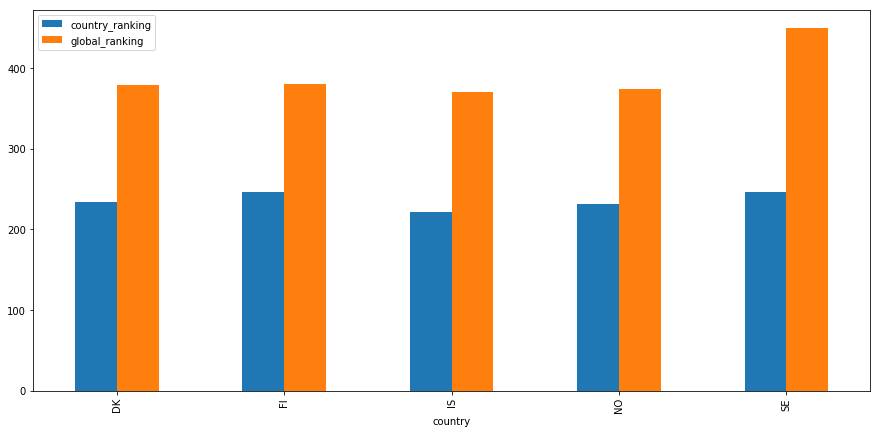

In [30]:
nordic_porn_data_by_country = categorised_data[is_nordic & is_porn].groupby(["country"])
mean_rankings = nordic_porn_data_by_country[["country_ranking", "global_ranking"]].mean()
mean_rankings.plot.bar(figsize=(15,7))

# Bonus: 

### Highest (or lowest) ranked porn site per country `=` quite difficult in `Excel`

In [31]:
country_ranking = categorised_data[is_nordic & is_porn]["country_ranking"]

In [32]:
is_top_pornsite = categorised_data[is_nordic & is_porn].groupby(['country'])['country_ranking'].transform(min)

In [33]:
top_nordic_pornsites = categorised_data[is_nordic & is_porn][country_ranking == is_top_pornsite]

In [34]:
top_nordic_pornsites.sort_values(by="country_ranking", ascending=True)

,global_ranking,country,site_title,country_ranking,category,site
17,95,IS,bongacams.com,18,porn,bongacams.com
3020,74,DK,livejasmin.com,21,porn,livejasmin.com
1023,74,SE,livejasmin.com,24,porn,livejasmin.com
2026,52,NO,pornhub.com,27,porn,pornhub.com
2527,74,FI,livejasmin.com,28,porn,livejasmin.com
